<a id="1"></a> <br>
## Import Libraries and the Data

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import itertools
import random
import os


2022-10-23 12:22:22.400607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 12:22:23.521479: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 12:22:25.278382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022-10-23 12:22:25.279137: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [4]:
df = pd.read_csv('/home/sean/5703/dataset/BAC_with_sentiment_1762_rows.csv')
df.head()

,date,open,close,low,high,volume,Sentiment_Score,Pos_Neg
0,2010-01-04,15.240000,15.690000,15.120000,15.750000,180845200.0,0.0,0.0
1,2010-01-05,15.740000,16.200001,15.700000,16.209999,209521300.0,0.0,0.0
2,2010-01-06,16.209999,16.389999,16.030001,16.540001,205257900.0,0.0,0.0
3,2010-01-07,16.680000,16.930000,16.510000,17.190001,320868400.0,0.0,0.0
4,2010-01-08,16.980000,16.780001,16.629999,17.100000,220104700.0,0.0,0.0


In [5]:
df1 = pd.read_csv('/home/sean/5703/dataset/bac.csv')
df1.head()

,date,open,close,low,high,volume
0,2010-01-04,15.240000,15.690000,15.120000,15.750000,180845200.0
1,2010-01-05,15.740000,16.200001,15.700000,16.209999,209521300.0
2,2010-01-06,16.209999,16.389999,16.030001,16.540001,205257900.0
3,2010-01-07,16.680000,16.930000,16.510000,17.190001,320868400.0
4,2010-01-08,16.980000,16.780001,16.629999,17.100000,220104700.0


In [6]:
df

,date,open,close,low,high,volume,Sentiment_Score,Pos_Neg
0,2010-01-04,15.240000,15.690000,15.120000,15.750000,180845200.0,0.000000,0.0
1,2010-01-05,15.740000,16.200001,15.700000,16.209999,209521300.0,0.000000,0.0
2,2010-01-06,16.209999,16.389999,16.030001,16.540001,205257900.0,0.000000,0.0
3,2010-01-07,16.680000,16.930000,16.510000,17.190001,320868400.0,0.000000,0.0
4,2010-01-08,16.980000,16.780001,16.629999,17.100000,220104700.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
1757,2016-12-23,22.510000,22.600000,22.430000,22.650000,38093700.0,0.508325,0.5
1758,2016-12-27,22.709999,22.610001,22.540001,22.740000,39891000.0,0.000000,0.0
1759,2016-12-28,22.620001,22.330000,22.260000,22.670000,52141300.0,0.000000,0.0
1760,2016-12-29,22.330000,22.000000,21.770000,22.389999,78979400.0,0.999100,1.0


In [7]:
df.shape

(1762, 8)

In [8]:
# # build dummy variables for non-numeric columns

# # 'GICS Sector' column
# gics_sector_list = df['GICS Sector'].unique().tolist()
# df['GICS Sector'] = df['GICS Sector'].apply(lambda x: gics_sector_list.index(x))

# # 'GICS Sub Industry' column
# gics_sub_industry_list = df['GICS Sub Industry'].unique().tolist()
# df['GICS Sub Industry'] = df['GICS Sub Industry'].apply(lambda x: gics_sub_industry_list.index(x))

# # 'Address of Headquarters' column
# address_of_headquarters_list = df['Address of Headquarters'].unique().tolist()
# df['Address of Headquarters'] = df['Address of Headquarters'].apply(lambda x: address_of_headquarters_list.index(x))

# # 'Date first added' column
# date_first_added_list = df['Date first added'].unique().tolist()
# df['Date first added'] = df['Date first added'].apply(lambda x: date_first_added_list.index(x))

# # 'Ticker symbol' column
# ticker_symbol_list = df['Ticker symbol'].unique().tolist()
# df['Ticker symbol'] = df['Ticker symbol'].apply(
#     lambda x: ticker_symbol_list.index(x))

In [9]:
# # use BAC as the examples
# df_BAC = df[df['Ticker symbol']== ticker_symbol_list.index('BAC')]

In [10]:
df_BAC1 = df
df_BAC1.shape

(1762, 8)

In [11]:
# df_BAC1 = df_BAC[['todate','open','low','high','volume','close']]
df_BAC1 = df_BAC1.reset_index(drop=True)
#df_BAC1['todate'] = pd.to_datetime(df_BAC1['todate']) 
df_BAC1.set_index('date', inplace=True)             


In [12]:
df_BAC1.head()

,open,close,low,high,volume,Sentiment_Score,Pos_Neg
date,,,,,,,
2010-01-04,15.240000,15.690000,15.120000,15.750000,180845200.0,0.0,0.0
2010-01-05,15.740000,16.200001,15.700000,16.209999,209521300.0,0.0,0.0
2010-01-06,16.209999,16.389999,16.030001,16.540001,205257900.0,0.0,0.0
2010-01-07,16.680000,16.930000,16.510000,17.190001,320868400.0,0.0,0.0
2010-01-08,16.980000,16.780001,16.629999,17.100000,220104700.0,0.0,0.0


<a id="24"></a> <br>
## Fearure Scaling

In [13]:
# Feature Scaling
#data_prices_scaled = df_BAC1
sc = MinMaxScaler(feature_range=(0, 1))
#data_prices_scaled[['volume']] = sc.fit_transform(df_BAC1[['volume']])
data_prices_scaled = sc.fit_transform(df_BAC1)

# # use standardization
# sc = StandardScaler()
# data_prices_scaled = sc.fit_transform(df_BAC1)

In [14]:
data_prices_scaled.shape

(1762, 7)

In [15]:
#data_prices_scaled = np.asarray(data_prices_scaled)
data_prices_scaled[0,:]

array([0.56121884, 0.58888277, 0.57046983, 0.57952672, 0.1898555 ,
       0.49982492, 0.5       ])

In [16]:
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage = 0):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i : i + n_future,1])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)

In [17]:
# n_future: Number of days you want to predict into the future
# n_past:  Number of past days you want to use to predict the future
n_future = 21
X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_prices_scaled, 
                                                            n_future=n_future, 
                                                            n_past=270, 
                                                            train_test_split_percentage=0.8,
                                                            validation_split_percentage = 0)

In [18]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1178, 270, 7)
(294, 270, 7)
(1178, 21)
(294, 21)


<a id="3"></a> <br>
## Train LSTM Model

In [19]:
# ------------------LSTM-----------------------
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=1024, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
regressor.add(LSTM(units=1024, return_sequences=False))
regressor.add(Dense(units=512, activation='linear'))
regressor.add(Dense(units=n_future, activation='linear'))

regressor.compile(optimizer='adam', 
                    loss='mse', 
                    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# regressor.summary()

2022-10-23 12:22:28.584790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 12:22:29.039529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 12:22:29.040143: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 12:22:29.045292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=64, callbacks=[es])

Epoch 1/40


2022-10-23 12:22:44.608074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


15/15 [==============================] - 20s 595ms/step - loss: 0.0733 - root_mean_squared_error: 0.2707 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 2/40
15/15 [==============================] - 8s 518ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0576
Epoch 3/40
15/15 [==============================] - 8s 519ms/step - loss: 0.0025 - root_mean_squared_error: 0.0505 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 4/40
15/15 [==============================] - 8s 519ms/step - loss: 0.0020 - root_mean_squared_error: 0.0448 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 5/40
15/15 [==============================] - 8s 518ms/step - loss: 0.0018 - root_mean_squared_error: 0.0426 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0430
Epoch 6/40
15/15 [==============================] - 8s 518ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0019 - val_root_mean_

In [21]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [22]:
len(history.history['root_mean_squared_error'])

10

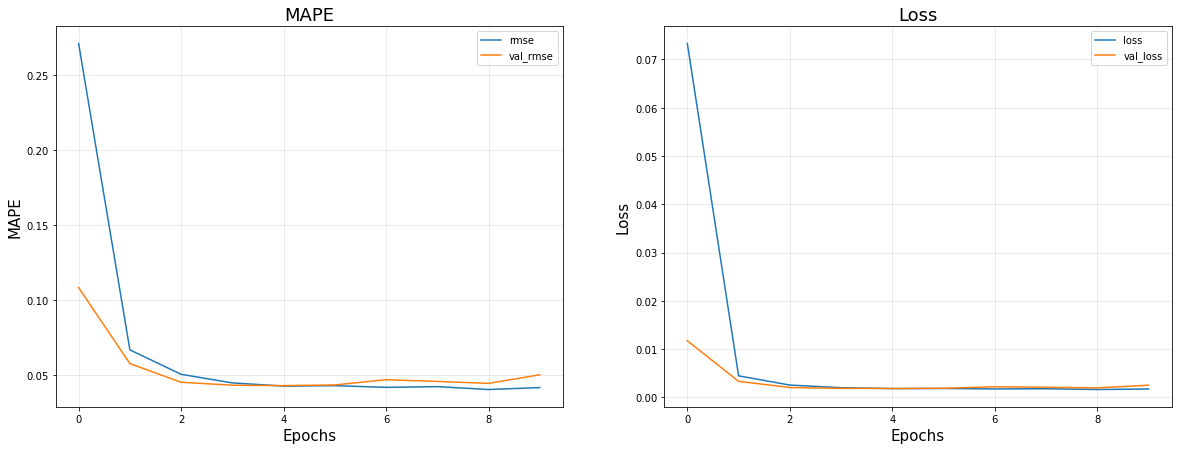

In [23]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("MAPE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MAPE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [24]:
results = regressor.evaluate(X_test, y_test)
print("test loss, test mape:", np.round(results, 4))

10/10 [==============================] - 1s 118ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768
test loss, test mape: [0.0059 0.0768]


10/10 [==============================] - 2s 115ms/step


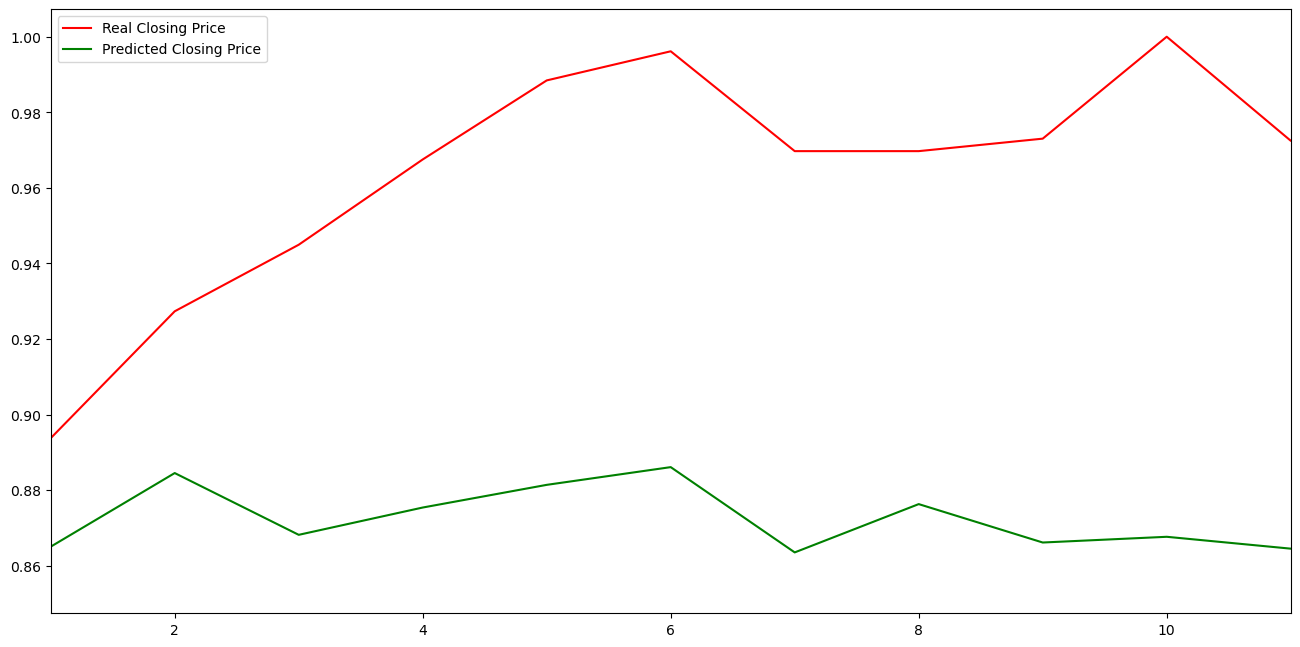

In [25]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test[-1], color='red', label = 'Real Closing Price')
plt.plot(y_pred[-1], color='green', label = 'Predicted Closing Price')
plt.xlim(1, 11)
plt.legend(loc='best')

<a id="4"></a> <br>
## Hyperparameter Tunning

In [26]:

def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

      

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

    

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [27]:
config = [[False], [False], [False], [16, 32], [8, 16, 32], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(False, False, False, 16, 8, 0.2), (False, False, False, 16, 16, 0.2), (False, False, False, 16, 32, 0.2), (False, False, False, 32, 8, 0.2), (False, False, False, 32, 16, 0.2), (False, False, False, 32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.00178, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.00178

Epoch 3: val_loss did not improve from 0.00178

Epoch 4: val_loss did not improve from 0.00178

Epoch 5: val_loss improved from 0.00178 to 0.00167, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.00167

Epoch 7: val_loss did not improve from 0.00167

Epoch 8: val_loss improved from 0.00167 to 0.00160, saving model to best_model.h5

Epoch 9: val_loss did not improve from 0.00160

Epoch 10: val_loss did not improve from 0.00160

Epoch 11: val_loss did not improve from 0.00160

Epoch 12: val_loss did not improve from 0.00160

Epoch 13: val_

<a id="44"></a> <br>
## Choosing the Best Model

In [28]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=7, ascending=True)
hist

,0,1,2,3,4,5,6,7
2,False,False,False,16,32,0.2,"[0.0019584097899496555, 54025.1484375]","[0.00735735148191452, 10.81341552734375]"
3,False,False,False,32,8,0.2,"[0.0018070428632199764, 66714.34375]","[0.007424869574606419, 10.723784446716309]"
5,False,False,False,32,32,0.2,"[0.0017338809557259083, 47128.1015625]","[0.007493237964808941, 11.0686616897583]"
1,False,False,False,16,16,0.2,"[0.002106588799506426, 46864.890625]","[0.009112787432968616, 12.043656349182129]"
4,False,False,False,32,16,0.2,"[0.0025802254676818848, 54485.28515625]","[0.009651129133999348, 12.471820831298828]"
0,False,False,False,16,8,0.2,"[0.0031672462355345488, 45177.83984375]","[0.011272650212049484, 13.709831237792969]"


<a id="5"></a> <br>
## Results

In [29]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[1, 0]}\n second_additional_layer = {hist.iloc[1, 1]}\n third_additional_layer = {hist.iloc[1, 2]}\n n_neurons = {hist.iloc[1, 3]}\n n_batch_size = {hist.iloc[1, 4]}\n dropout = {hist.iloc[1, 5]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set MAPE: {np.round(results, 4)[1]}\n')
print(f'Results After Tunning:\n Test Set MAPE: {np.round(hist.iloc[1, -1], 4)[1]}\n')
print(f'{np.round((results[1] - hist.iloc[1, -1][1])*100/np.round(results, 4)[1])}% Improvement')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 third_additional_layer = False
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
Results Before Tunning:
 Test Set MAPE: 0.0768

Results After Tunning:
 Test Set MAPE: 10.7238

-13863.0% Improvement


In [30]:
first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[1, :-2])

In [31]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if third_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.00292, saving model to best_model.h5

Epoch 2: val_loss improved from 0.00292 to 0.00216, saving model to best_model.h5

Epoch 3: val_loss improved from 0.00216 to 0.00149, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.00149

Epoch 5: val_loss did not improve from 0.00149

Epoch 6: val_loss did not improve from 0.00149

Epoch 7: val_loss did not improve from 0.00149

Epoch 8: val_loss did not improve from 0.00149
Epoch 8: early stopping


In [32]:
regressor.evaluate(X_test, y_test)

10/10 [==============================] - 0s 8ms/step - loss: 0.0074 - mean_absolute_percentage_error: 11.4994


[0.0074109481647610664, 11.499384880065918]

In [33]:
X_test.shape

(294, 270, 7)

In [34]:
y_test.shape

(294, 21)

In [35]:
y_pred.shape

(294, 21)

10/10 [==============================] - 0s 7ms/step


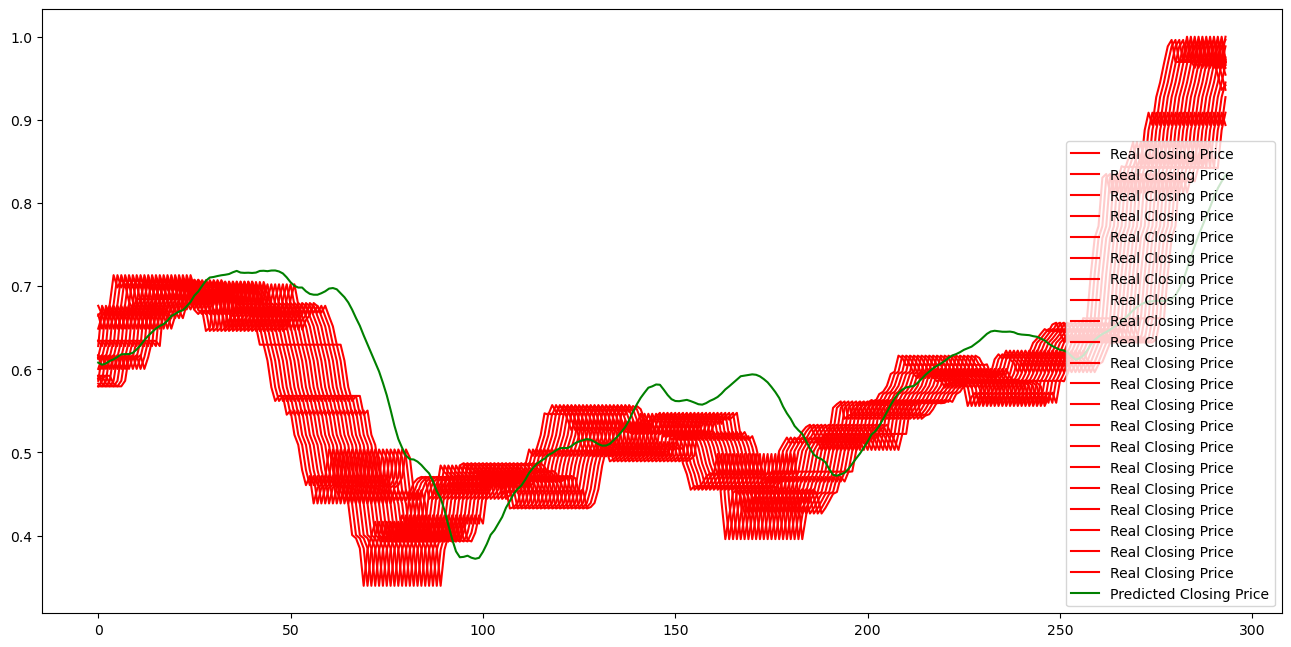

In [36]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Closing Price')
plt.plot(y_pred, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')